In [69]:
import pandas as pd

In [70]:
#connecting to the database
import mysql.connector
client=mysql.connector.connect(host="durgaserver.chiuaw4k4lyt.ap-south-1.rds.amazonaws.com",user="admin",password="Shivani2020",port=3306)
FP=client.cursor()

In [71]:
FP.execute("use gravity_books;")
client.commit()

In [72]:
FP.execute("show tables;")
for a in FP:
    print(a)

('address',)
('address_status',)
('author',)
('book',)
('book_author',)
('book_language',)
('country',)
('cust_order',)
('customer',)
('customer_address',)
('order_history',)
('order_line',)
('order_status',)
('publisher',)
('shipping_method',)


In [73]:
#Extracting data from database to dataframe
query = """select * from book b 
inner join publisher p on b.publisher_id=p.publisher_id
inner join book_author ba on b.book_id=ba.book_id
inner join author a on a.author_id=ba.author_id
inner join book_language bl on b.language_id=bl.language_id;"""

In [74]:
bookdf=pd.read_sql(query,client)
bookdf

C:\Users\hp\AppData\Local\Temp\ipykernel_14780\3074635167.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bookdf=pd.read_sql(query,client)


,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_id,publisher_name,book_id,author_id,author_id,author_name,language_id,language_code,language_name
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,1967,Thomas Nelson,2,5049,5049,Larry Burkett,1,eng,English
1,3,The Servant Leader,23755004321,1,128,2003-03-11,1967,1967,Thomas Nelson,3,4902,4902,Kenneth H. Blanchard,1,eng,English
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,1978,Time Life Medical,4,8651,8651,Time-Life Books,1,eng,English
3,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1,80,1983-12-29,416,416,Cliffs Notes,5,8904,8904,W. John Campbell,1,eng,English
4,6,Life Is a Dream and Other Spanish Classics (Er...,73999140774,1,298,2000-04-01,96,96,Applause Theatre & Cinema Book Publishers,6,2497,2497,Eric Bentley,1,eng,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,8624,In Wonderland,9780970312556,24,185,2003-09-01,1009,1009,Ig Publishing,8624,8430,8430,Sverre Lyngstad,24,nor,Norwegian
17638,10854,Harry Potter ve Sırlar Odası (Harry Potter #2),9783570211021,25,403,2001-10-01,2234,2234,Yapı Kredi Yayınları,10854,3570,3570,J.K. Rowling,25,tur,Turkish
17639,10854,Harry Potter ve Sırlar Odası (Harry Potter #2),9783570211021,25,403,2001-10-01,2234,2234,Yapı Kredi Yayınları,10854,7996,7996,Sevin Okyay,25,tur,Turkish
17640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,294,Bloomsbury USA Childrens,9702,3570,3570,J.K. Rowling,26,gla,Gaelic


In [75]:
bookdf.columns.duplicated()

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False])

In [76]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17642 entries, 0 to 17641
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           17642 non-null  int64 
 1   title             17642 non-null  object
 2   isbn13            17642 non-null  object
 3   language_id       17642 non-null  int64 
 4   num_pages         17642 non-null  int64 
 5   publication_date  17642 non-null  object
 6   publisher_id      17642 non-null  int64 
 7   publisher_id      17642 non-null  int64 
 8   publisher_name    17642 non-null  object
 9   book_id           17642 non-null  int64 
 10  author_id         17642 non-null  int64 
 11  author_id         17642 non-null  int64 
 12  author_name       17642 non-null  object
 13  language_id       17642 non-null  int64 
 14  language_code     17642 non-null  object
 15  language_name     17642 non-null  object
dtypes: int64(9), object(7)
memory usage: 2.2+ MB


In [77]:
bookdf=bookdf.T.drop_duplicates().T

In [78]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17642 entries, 0 to 17641
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           17642 non-null  object
 1   title             17642 non-null  object
 2   isbn13            17642 non-null  object
 3   language_id       17642 non-null  object
 4   num_pages         17642 non-null  object
 5   publication_date  17642 non-null  object
 6   publisher_id      17642 non-null  object
 7   publisher_name    17642 non-null  object
 8   author_id         17642 non-null  object
 9   author_name       17642 non-null  object
 10  language_code     17642 non-null  object
 11  language_name     17642 non-null  object
dtypes: object(12)
memory usage: 1.6+ MB


In [79]:
query2="""select * from customer c 
inner join customer_address ca on c.customer_id=ca.customer_id
inner join address_status ads on ca.status_id=ads.status_id
inner join address ad on ad.address_id=ca.address_id
inner join country ct on ct.country_id=ad.country_id;"""

In [80]:
clientdf=pd.read_sql(query2,client)
clientdf

C:\Users\hp\AppData\Local\Temp\ipykernel_14780\225167435.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clientdf=pd.read_sql(query2,client)


,customer_id,first_name,last_name,email,customer_id,address_id,status_id,status_id,address_status,address_id,street_number,street_name,city,country_id,country_id,country_name
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1,336,1,1,Active,336,30759,Nobel Circle,Zhongcun,42,42,China
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1,895,1,1,Active,895,15720,Scott Plaza,Fort Erie,37,37,Canada
2,2,Ruthanne,Vatini,rvatini1@fema.gov,2,1,1,1,Active,1,57,Glacier Hill Avenue,Torbat-e Jām,95,95,Iran
3,2,Ruthanne,Vatini,rvatini1@fema.gov,2,239,1,1,Active,239,73,1st Street,Alubijid,159,159,Philippines
4,2,Ruthanne,Vatini,rvatini1@fema.gov,2,866,1,1,Active,866,910,Susan Trail,Lubniewice,163,163,Poland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,1996,Byron,Mayor,bmayorrn@netscape.com,1996,967,1,1,Active,967,5777,Homewood Avenue,Pueblo Nuevo,158,158,Peru
3346,1997,Janean,Coatsworth,jcoatsworthro@purevolume.com,1997,95,1,1,Active,95,49685,Melody Hill,Chaplygin,172,172,Russia
3347,1998,Georgeanna,Garman,ggarmanrp@surveymonkey.com,1998,360,1,1,Active,360,31917,Mitchell Park,Pshada,172,172,Russia
3348,1999,Ardeen,Caret,acaretrq@wsj.com,1999,221,1,1,Active,221,5396,Mallory Avenue,Chicago,217,217,United States of America


In [81]:
clientdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     3350 non-null   int64 
 1   first_name      3350 non-null   object
 2   last_name       3350 non-null   object
 3   email           3350 non-null   object
 4   customer_id     3350 non-null   int64 
 5   address_id      3350 non-null   int64 
 6   status_id       3350 non-null   int64 
 7   status_id       3350 non-null   int64 
 8   address_status  3350 non-null   object
 9   address_id      3350 non-null   int64 
 10  street_number   3350 non-null   object
 11  street_name     3350 non-null   object
 12  city            3350 non-null   object
 13  country_id      3350 non-null   int64 
 14  country_id      3350 non-null   int64 
 15  country_name    3350 non-null   object
dtypes: int64(8), object(8)
memory usage: 418.9+ KB


In [82]:
clientdf=clientdf.T.drop_duplicates().T
clientdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     3350 non-null   object
 1   first_name      3350 non-null   object
 2   last_name       3350 non-null   object
 3   email           3350 non-null   object
 4   address_id      3350 non-null   object
 5   status_id       3350 non-null   object
 6   address_status  3350 non-null   object
 7   street_number   3350 non-null   object
 8   street_name     3350 non-null   object
 9   city            3350 non-null   object
 10  country_id      3350 non-null   object
 11  country_name    3350 non-null   object
dtypes: object(12)
memory usage: 314.2+ KB


In [83]:
query3="""select * from order_line ol 
inner join cust_order co on ol.order_id=co.order_id
inner join shipping_method sm on sm.method_id=co.shipping_method_id
inner join order_history oh on oh.order_id=ol.order_id
inner join order_status os on os.status_id=oh.status_id;"""

In [84]:
orderdf=pd.read_sql(query3,client)
orderdf

C:\Users\hp\AppData\Local\Temp\ipykernel_14780\2875955835.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderdf=pd.read_sql(query3,client)


,line_id,order_id,book_id,price,order_id,order_date,customer_id,shipping_method_id,dest_address_id,method_id,method_name,cost,history_id,order_id,status_id,status_date,status_id,status_value
0,2,2,7872,3.25,2,2024-05-20 02:42:50,1,1,895,1,Standard,5.9,2,2,1,2024-05-20 02:49:26,1,Order Received
1,2,2,7872,3.25,2,2024-05-20 02:42:50,1,1,895,1,Standard,5.9,10766,2,2,2024-05-20 19:20:34,2,Pending Delivery
2,2,2,7872,3.25,2,2024-05-20 02:42:50,1,1,895,1,Standard,5.9,18510,2,3,2024-05-21 06:58:13,3,Delivery In Progress
3,2,2,7872,3.25,2,2024-05-20 02:42:50,1,1,895,1,Standard,5.9,23671,2,4,2024-05-21 20:31:51,4,Delivered
4,12103,2,7737,18.91,2,2024-05-20 02:42:50,1,1,895,1,Standard,5.9,2,2,1,2024-05-20 02:49:26,1,Order Received
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45646,423,11431,7483,12.21,11431,2023-07-19 10:54:30,23,4,984,4,International,24.5,22555,11431,4,2023-07-27 05:57:58,4,Delivered
45647,432,11432,958,13.52,11432,2022-04-19 13:38:52,24,4,646,4,International,24.5,7546,11432,1,2022-04-20 00:37:28,1,Order Received
45648,432,11432,958,13.52,11432,2022-04-19 13:38:52,24,4,646,4,International,24.5,10747,11432,2,2022-04-21 06:43:38,2,Pending Delivery
45649,458,11434,522,4.58,11434,2023-03-22 12:01:00,26,4,451,4,International,24.5,7548,11434,1,2023-03-22 14:58:28,1,Order Received


In [85]:
orderdf=orderdf.T.drop_duplicates().T
orderdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45651 entries, 0 to 45650
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   line_id             45651 non-null  object
 1   order_id            45651 non-null  object
 2   book_id             45651 non-null  object
 3   price               45651 non-null  object
 4   order_date          45651 non-null  object
 5   customer_id         45651 non-null  object
 6   shipping_method_id  45651 non-null  object
 7   dest_address_id     45651 non-null  object
 8   method_name         45651 non-null  object
 9   cost                45651 non-null  object
 10  history_id          45651 non-null  object
 11  status_id           45651 non-null  object
 12  status_date         45651 non-null  object
 13  status_value        45651 non-null  object
dtypes: object(14)
memory usage: 4.9+ MB


In [86]:
df1=pd.merge(bookdf,orderdf,on='book_id',how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72685 entries, 0 to 72684
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   book_id             72685 non-null  object
 1   title               72685 non-null  object
 2   isbn13              72685 non-null  object
 3   language_id         72685 non-null  object
 4   num_pages           72685 non-null  object
 5   publication_date    72685 non-null  object
 6   publisher_id        72685 non-null  object
 7   publisher_name      72685 non-null  object
 8   author_id           72685 non-null  object
 9   author_name         72685 non-null  object
 10  language_code       72685 non-null  object
 11  language_name       72685 non-null  object
 12  line_id             72685 non-null  object
 13  order_id            72685 non-null  object
 14  price               72685 non-null  object
 15  order_date          72685 non-null  object
 16  customer_id         72

In [87]:
#merging dataframes to one final dataframe
finaldf=pd.merge(df1,clientdf,on='customer_id',how='inner')
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149446 entries, 0 to 149445
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   book_id             149446 non-null  object
 1   title               149446 non-null  object
 2   isbn13              149446 non-null  object
 3   language_id         149446 non-null  object
 4   num_pages           149446 non-null  object
 5   publication_date    149446 non-null  object
 6   publisher_id        149446 non-null  object
 7   publisher_name      149446 non-null  object
 8   author_id           149446 non-null  object
 9   author_name         149446 non-null  object
 10  language_code       149446 non-null  object
 11  language_name       149446 non-null  object
 12  line_id             149446 non-null  object
 13  order_id            149446 non-null  object
 14  price               149446 non-null  object
 15  order_date          149446 non-null  object
 16  cu

In [88]:
#Checking if there are any duplicate columns
finaldf.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [89]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica


In [90]:
#finaldf.to_csv("C:/Users/hp/Desktop/Final_Project/finaldf_data.csv",sep=',',encoding='utf-8')

In [91]:
# Convert order_date to datetime
finaldf['order_date'] = pd.to_datetime(finaldf['order_date'])

In [92]:
import datetime
from datetime import datetime, timedelta


In [93]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica


In [94]:
pd.set_option('display.max_columns',None)

In [95]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica


In [96]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149446 entries, 0 to 149445
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   book_id             149446 non-null  object        
 1   title               149446 non-null  object        
 2   isbn13              149446 non-null  object        
 3   language_id         149446 non-null  object        
 4   num_pages           149446 non-null  object        
 5   publication_date    149446 non-null  object        
 6   publisher_id        149446 non-null  object        
 7   publisher_name      149446 non-null  object        
 8   author_id           149446 non-null  object        
 9   author_name         149446 non-null  object        
 10  language_code       149446 non-null  object        
 11  language_name       149446 non-null  object        
 12  line_id             149446 non-null  object        
 13  order_id            149446 no

In [97]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [98]:
backupdf=finaldf.copy()

In [99]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149446 entries, 0 to 149445
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   book_id             149446 non-null  object        
 1   title               149446 non-null  object        
 2   isbn13              149446 non-null  object        
 3   language_id         149446 non-null  object        
 4   num_pages           149446 non-null  object        
 5   publication_date    149446 non-null  object        
 6   publisher_id        149446 non-null  object        
 7   publisher_name      149446 non-null  object        
 8   author_id           149446 non-null  object        
 9   author_name         149446 non-null  object        
 10  language_code       149446 non-null  object        
 11  language_name       149446 non-null  object        
 12  line_id             149446 non-null  object        
 13  order_id            149446 no

In [100]:
finaldf.method_name.value_counts()

method_name
Express          39347
Priority         37192
Standard         36775
International    36132
Name: count, dtype: int64

In [103]:
min_dates=finaldf.groupby(["customer_id"])["order_date"].min() #getting the min date of order dates for each customer

In [104]:
finaldf["firstpurchasedate"]=finaldf.apply(lambda row:min_dates.loc[row["customer_id"]],axis=1) #calculating the first purchase date of each customer

In [105]:
max_dates=finaldf.groupby(["customer_id"])["order_date"].max()
finaldf["lastpurchasedate"]=finaldf.apply(lambda row:max_dates.loc[row["customer_id"]],axis=1) #calculating the last purchase date of each customer

In [106]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17 01:21:35,2024-06-23 20:37:21
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17 01:21:35,2024-06-23 20:37:21
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18 16:24:21,2024-10-26 14:16:08
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18 16:24:21,2024-10-26 14:16:08
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18 16:24:21,2024-10-26 14:16:08
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18 16:24:21,2024-10-26 14:16:08


In [107]:
import datetime as dt

In [108]:
finaldf["firstpurchasedate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 149446 entries, 0 to 149445
Series name: firstpurchasedate
Non-Null Count   Dtype         
--------------   -----         
149446 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [109]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17 01:21:35,2024-06-23 20:37:21
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17 01:21:35,2024-06-23 20:37:21
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18 16:24:21,2024-10-26 14:16:08
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18 16:24:21,2024-10-26 14:16:08
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18 16:24:21,2024-10-26 14:16:08
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18 16:24:21,2024-10-26 14:16:08


In [110]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149446 entries, 0 to 149445
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   book_id             149446 non-null  object        
 1   title               149446 non-null  object        
 2   isbn13              149446 non-null  object        
 3   language_id         149446 non-null  object        
 4   num_pages           149446 non-null  object        
 5   publication_date    149446 non-null  object        
 6   publisher_id        149446 non-null  object        
 7   publisher_name      149446 non-null  object        
 8   author_id           149446 non-null  object        
 9   author_name         149446 non-null  object        
 10  language_code       149446 non-null  object        
 11  language_name       149446 non-null  object        
 12  line_id             149446 non-null  object        
 13  order_id            149446 no

In [111]:
#changing dates in to datetime
finaldf["firstpurchasedate"]=pd.to_datetime(finaldf["firstpurchasedate"],format='%Y-%m-%d')
finaldf["lastpurchasedate"]=pd.to_datetime(finaldf["lastpurchasedate"],format='%Y-%m-%d')

In [112]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17 01:21:35,2024-06-23 20:37:21
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17 01:21:35,2024-06-23 20:37:21
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17 01:21:35,2024-06-23 20:37:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18 16:24:21,2024-10-26 14:16:08
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18 16:24:21,2024-10-26 14:16:08
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18 16:24:21,2024-10-26 14:16:08
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18 16:24:21,2024-10-26 14:16:08


In [113]:
finaldf["lastpurchasedate"]=pd.to_datetime(finaldf["lastpurchasedate"],format='%Y-%m-%d').dt.date
finaldf["firstpurchasedate"]=pd.to_datetime(finaldf["firstpurchasedate"],format='%Y-%m-%d').dt.date

In [114]:
from datetime import date

In [115]:
today=date.today()
today

datetime.date(2024, 12, 22)

In [116]:
finaldf["lastpurchasedate"]

0         2024-06-23
1         2024-06-23
2         2024-06-23
3         2024-06-23
4         2024-06-23
             ...    
149441    2024-10-26
149442    2024-10-26
149443    2024-10-26
149444    2024-10-26
149445    2024-10-26
Name: lastpurchasedate, Length: 149446, dtype: object

In [117]:
finaldf["loyalty"]=(today-finaldf["firstpurchasedate"])/np.timedelta64(1,'D') #calculating the loyalty of each customer based on the first purchase date
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,2024-06-23,980.0
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,2024-06-23,980.0
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,2024-10-26,1069.0
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18,2024-10-26,1069.0
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18,2024-10-26,1069.0
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,2024-10-26,1069.0


In [118]:
finaldf["tenure"]=(today-finaldf["lastpurchasedate"])/np.timedelta64(1,'D')

In [119]:
finaldf["tenure"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 149446 entries, 0 to 149445
Series name: tenure
Non-Null Count   Dtype  
--------------   -----  
149446 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [120]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,tenure
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0,182.0
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,2024-06-23,980.0,182.0
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0,182.0
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,2024-06-23,980.0,182.0
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0,182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,2024-10-26,1069.0,57.0
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18,2024-10-26,1069.0,57.0
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18,2024-10-26,1069.0,57.0
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,2024-10-26,1069.0,57.0


In [121]:
# Add a churn column
finaldf['churn'] = finaldf['tenure'].apply(lambda x: 'Yes' if x > 180 else 'No')

finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,tenure,churn
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0,182.0,Yes
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,2024-06-23,980.0,182.0,Yes
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0,182.0,Yes
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,2024-06-23,980.0,182.0,Yes
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,2024-06-23,980.0,182.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,2024-10-26,1069.0,57.0,No
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18,2024-10-26,1069.0,57.0,No
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18,2024-10-26,1069.0,57.0,No
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,2024-10-26,1069.0,57.0,No


In [122]:
#finaldf.to_csv("C:/Users/hp/Desktop/Final_Project/finaldf_data_churn.csv",sep=',',encoding='utf-8')

Text(0.5, 1.0, 'Count of Target variable')

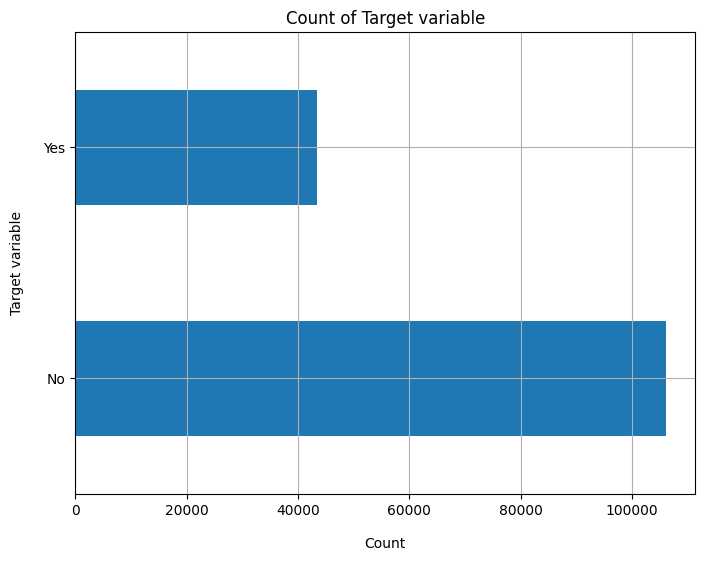

In [123]:
finaldf["churn"].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target variable", labelpad=14)
plt.grid()
plt.title("Count of Target variable")

In [124]:
100*finaldf["churn"].value_counts()/len(finaldf["churn"])

churn
No     70.966771
Yes    29.033229
Name: count, dtype: float64

In [125]:
finaldf.churn.value_counts()

churn
No     106057
Yes     43389
Name: count, dtype: int64

In [127]:
max_dates=finaldf.groupby(["customer_id"])["book_id"].count()
finaldf["lastpurchasedate"]=finaldf.apply(lambda row:max_dates.loc[row["customer_id"]],axis=1)

In [128]:
finaldf["orderscount"]=finaldf.groupby('customer_id')['order_id'].transform('count') #calculating the number of orders for each customer
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,tenure,churn,bookspurchased,orderscount
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,24,980.0,182.0,Yes,Yes,24
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,24,980.0,182.0,Yes,Yes,24
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,24,980.0,182.0,Yes,Yes,24
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,24,980.0,182.0,Yes,Yes,24
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,24,980.0,182.0,Yes,Yes,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,699,1069.0,57.0,No,No,699
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18,699,1069.0,57.0,No,No,699
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18,699,1069.0,57.0,No,No,699
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,699,1069.0,57.0,No,No,699


In [129]:
finaldf.rename(columns={'tenure':'inactive_tenure'},inplace=True)

In [130]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,inactive_tenure,churn,bookspurchased,orderscount
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,24,980.0,182.0,Yes,Yes,24
1,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,1733,1,2024-06-24 05:33:52,Order Received,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,24,980.0,182.0,Yes,Yes,24
2,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,24,980.0,182.0,Yes,Yes,24
3,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,13931,2,2024-06-24 16:10:28,Pending Delivery,Waylen,Sarjent,wsarjentz@huffingtonpost.com,946,1,Active,214,Park Meadow Parkway,Fanzeres,164,Portugal,2022-04-17,24,980.0,182.0,Yes,Yes,24
4,2,The Illuminati,20049130001,1,352,2004-10-04,1967,Thomas Nelson,5049,Larry Burkett,eng,English,16195,1733,17.5,2024-06-23 20:37:21,1036,3,946,Express,11.9,17003,3,2024-06-26 11:55:18,Delivery In Progress,Waylen,Sarjent,wsarjentz@huffingtonpost.com,723,1,Active,934,Veith Place,Ipoh,127,Malaysia,2022-04-17,24,980.0,182.0,Yes,Yes,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149441,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,699,1069.0,57.0,No,No,699
149442,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,17667,3,2022-11-07 05:56:42,Delivery In Progress,Coretta,Dublin,cdublin2p@time.com,613,1,Active,652,Rusk Trail,Kidričevo,182,Slovenia,2022-01-18,699,1069.0,57.0,No,No,699
149443,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,339,2,Inactive,3,Clemons Park,Poniatowa,163,Poland,2022-01-18,699,1069.0,57.0,No,No,699
149444,2843,Shield of Thunder (Troy #2),9780345477019,27,512,2007-03-27,180,Ballantine Books,9187,Željko Petrović,ale,Aleut,8496,9386,2.87,2022-11-05 19:15:55,98,4,543,International,24.5,20486,4,2022-11-10 13:54:15,Delivered,Coretta,Dublin,cdublin2p@time.com,543,1,Active,90938,Butternut Junction,Quesada,50,Costa Rica,2022-01-18,699,1069.0,57.0,No,No,699


In [131]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149446 entries, 0 to 149445
Data columns (total 43 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   book_id             149446 non-null  object        
 1   title               149446 non-null  object        
 2   isbn13              149446 non-null  object        
 3   language_id         149446 non-null  object        
 4   num_pages           149446 non-null  object        
 5   publication_date    149446 non-null  object        
 6   publisher_id        149446 non-null  object        
 7   publisher_name      149446 non-null  object        
 8   author_id           149446 non-null  object        
 9   author_name         149446 non-null  object        
 10  language_code       149446 non-null  object        
 11  language_name       149446 non-null  object        
 12  line_id             149446 non-null  object        
 13  order_id            149446 no

In [132]:
data=pd.DataFrame(finaldf)
print(data.corr(numeric_only=True)) #Correlation between the numeric columns

                  lastpurchasedate   loyalty  inactive_tenure  orderscount
lastpurchasedate          1.000000  0.407834        -0.368891     1.000000
loyalty                   0.407834  1.000000        -0.178281     0.407834
inactive_tenure          -0.368891 -0.178281         1.000000    -0.368891
orderscount               1.000000  0.407834        -0.368891     1.000000


In [266]:
#Removing unwanted columns by selecting required fields in a new df
df=finaldf[['order_date','price','inactive_tenure','loyalty','orderscount','churn']].copy()

In [267]:
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn
0,2024-06-23 20:37:21,17.5,182.0,980.0,24,Yes
1,2024-06-23 20:37:21,17.5,182.0,980.0,24,Yes
2,2024-06-23 20:37:21,17.5,182.0,980.0,24,Yes
3,2024-06-23 20:37:21,17.5,182.0,980.0,24,Yes
4,2024-06-23 20:37:21,17.5,182.0,980.0,24,Yes
...,...,...,...,...,...,...
149441,2022-11-05 19:15:55,2.87,57.0,1069.0,699,No
149442,2022-11-05 19:15:55,2.87,57.0,1069.0,699,No
149443,2022-11-05 19:15:55,2.87,57.0,1069.0,699,No
149444,2022-11-05 19:15:55,2.87,57.0,1069.0,699,No


In [268]:
df=df.drop_duplicates()
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn
0,2024-06-23 20:37:21,17.5,182.0,980.0,24,Yes
8,2022-10-15 02:08:42,7.5,116.0,799.0,366,No
16,2023-07-30 05:45:04,2.67,36.0,1006.0,864,No
32,2022-05-02 19:06:16,15.75,49.0,965.0,174,No
44,2022-01-08 21:09:35,11.82,41.0,1102.0,280,No
...,...,...,...,...,...,...
149404,2022-03-03 09:11:20,17.43,224.0,1095.0,172,Yes
149416,2023-06-08 21:52:14,16.95,35.0,920.0,172,No
149428,2022-03-16 00:51:34,12.67,137.0,1079.0,228,No
149432,2022-07-16 04:40:25,0.63,709.0,1080.0,28,Yes


In [269]:
df=df.reset_index()

In [270]:
df=df.drop(["index"],axis=1)
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn
0,2024-06-23 20:37:21,17.5,182.0,980.0,24,Yes
1,2022-10-15 02:08:42,7.5,116.0,799.0,366,No
2,2023-07-30 05:45:04,2.67,36.0,1006.0,864,No
3,2022-05-02 19:06:16,15.75,49.0,965.0,174,No
4,2022-01-08 21:09:35,11.82,41.0,1102.0,280,No
...,...,...,...,...,...,...
13883,2022-03-03 09:11:20,17.43,224.0,1095.0,172,Yes
13884,2023-06-08 21:52:14,16.95,35.0,920.0,172,No
13885,2022-03-16 00:51:34,12.67,137.0,1079.0,228,No
13886,2022-07-16 04:40:25,0.63,709.0,1080.0,28,Yes


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13888 entries, 0 to 13887
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_date       13888 non-null  datetime64[ns]
 1   price            13888 non-null  float64       
 2   inactive_tenure  13888 non-null  Int64         
 3   loyalty          13888 non-null  Int64         
 4   orderscount      13888 non-null  int64         
 5   churn            13888 non-null  int64         
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(2)
memory usage: 678.3 KB


In [271]:
df['price']=pd.to_numeric(df['price'])

In [272]:
df['inactive_tenure']=pd.to_numeric(df['inactive_tenure'])

In [273]:
df['inactive_tenure']=df['inactive_tenure'].round().astype('Int64')

In [274]:
df['loyalty']=df['loyalty'].round().astype('Int64')

In [252]:
df['loyalty'].describe()

count       13888.0
mean     952.885873
std      190.020149
min            23.0
25%           903.0
50%          1019.0
75%          1080.0
max          1115.0
Name: loyalty, dtype: Float64

In [254]:
df['price'].describe()

count    13888.000000
mean        10.022152
std          5.755839
min          0.000000
25%          5.070000
50%          9.955000
75%         14.980000
max         20.000000
Name: price, dtype: float64

In [253]:
df['order_date_year'].describe()

count    13888.000000
mean      2022.924899
std          0.851410
min       2021.000000
25%       2022.000000
50%       2023.000000
75%       2024.000000
max       2024.000000
Name: order_date_year, dtype: float64

In [251]:
df["inactive_tenure"].describe()

count       13888.0
mean     190.240783
std      199.357173
min            20.0
25%            57.0
50%           115.0
75%           243.0
max          1114.0
Name: inactive_tenure, dtype: Float64

In [ ]:
df['order_date']=pd.to_datetime(df['order_date'].dt.date)
df['order_date_day']=df['order_date'].dt.day
df['order_date_month']=df['order_date'].dt.month
df['order_date_year']=df['order_date'].dt.year

In [168]:
for column in df.columns:
    print(df[column].value_counts())
    print(("*"*20))

order_date
2022-01-18 20:11:53    6
2024-04-07 22:48:02    5
2024-03-02 12:42:24    5
2024-03-18 12:15:27    5
2023-04-02 18:23:32    5
                      ..
2023-12-04 11:59:37    1
2022-08-03 09:40:06    1
2022-05-14 21:42:31    1
2024-05-15 10:02:12    1
2023-05-14 12:51:56    1
Name: count, Length: 7304, dtype: int64
********************
price
14.63    19
12.21    17
11.73    16
0.98     16
7.83     15
         ..
5.29      1
4.39      1
5.56      1
13.60     1
8.98      1
Name: count, Length: 2001, dtype: int64
********************
inactive_tenure
57.0      199
45.0      186
50.0      185
68.0      166
24.0      148
         ... 
803.0       1
954.0       1
1086.0      1
632.0       1
797.0       1
Name: count, Length: 650, dtype: int64
********************
loyalty
1101.0    340
1097.0    241
1111.0    172
1069.0    167
1100.0    152
         ... 
164.0       1
183.0       1
130.0       1
84.0        1
797.0       1
Name: count, Length: 648, dtype: int64
********************
or

In [150]:
#EDA - Exploratory Data analysis
import matplotlib.pyplot as plt 

KeyError: 'order_date_year'

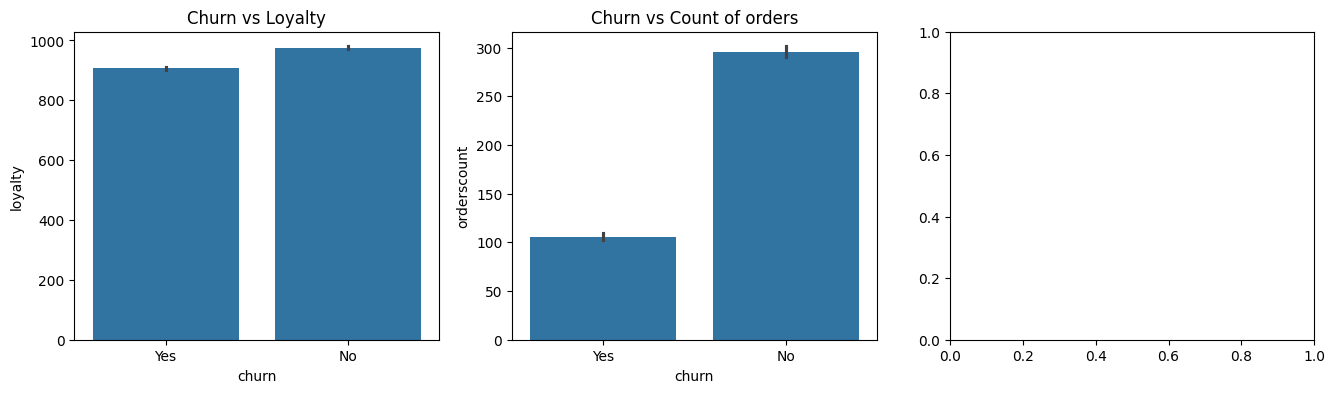

In [275]:
#plotting all the three numerical columns with churn
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.barplot(x=df["churn"],y=df["loyalty"]);
plt.title("Churn vs Loyalty")

plt.subplot(1,3,2)
sns.barplot(x=df["churn"],y=df["orderscount"]);
plt.title("Churn vs Count of orders")

plt.subplot(1,3,3)
sns.barplot(x=df["churn"],y=df["order_date_year"]);
plt.title("Churn vs Order_Date_year")

CONCLUSION
These are some of the quick insights from this exercise:

Higher the loyalty lower the churn
People with less orders have churned
churn quality is evenly distributed for all years

In [138]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [286]:
le=preprocessing.LabelEncoder()

In [287]:
df["churn"]=le.fit_transform(df["churn"]) 
df["churn"].unique()

array([1, 0])

In [278]:
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn,order_date_day,order_date_month,order_date_year
0,2024-06-23,17.50,182,980,24,Yes,23,6,2024
1,2022-10-15,7.50,116,799,366,No,15,10,2022
2,2023-07-30,2.67,36,1006,864,No,30,7,2023
3,2022-05-02,15.75,49,965,174,No,2,5,2022
4,2022-01-08,11.82,41,1102,280,No,8,1,2022
...,...,...,...,...,...,...,...,...,...
13883,2022-03-03,17.43,224,1095,172,Yes,3,3,2022
13884,2023-06-08,16.95,35,920,172,No,8,6,2023
13885,2022-03-16,12.67,137,1079,228,No,16,3,2022
13886,2022-07-16,0.63,709,1080,28,Yes,16,7,2022


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13888 entries, 0 to 13887
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        13888 non-null  datetime64[ns]
 1   price             13888 non-null  float64       
 2   inactive_tenure   13888 non-null  Int64         
 3   loyalty           13888 non-null  Int64         
 4   orderscount       13888 non-null  int64         
 5   churn             13888 non-null  int64         
 6   order_date_day    13888 non-null  int32         
 7   order_date_month  13888 non-null  int32         
 8   order_date_year   13888 non-null  int32         
dtypes: Int64(2), datetime64[ns](1), float64(1), int32(3), int64(2)
memory usage: 841.0 KB


In [196]:
#Correlation
my_matrix=df.corr(numeric_only=True).round(2)
my_matrix

,price,inactive_tenure,loyalty,orderscount,churn,order_date_day,order_date_month,order_date_year
price,1.00,0.01,0.01,0.00,0.02,0.00,-0.01,-0.00
inactive_tenure,0.01,1.00,-0.14,-0.36,0.77,0.01,-0.08,-0.25
loyalty,0.01,-0.14,1.00,0.39,-0.17,-0.01,-0.05,-0.24
orderscount,0.00,-0.36,0.39,1.00,-0.36,-0.01,0.01,-0.01
churn,0.02,0.77,-0.17,-0.36,1.00,0.01,-0.09,-0.16
order_date_day,0.00,0.01,-0.01,-0.01,0.01,1.00,0.02,-0.01
order_date_month,-0.01,-0.08,-0.05,0.01,-0.09,0.02,1.00,-0.13
order_date_year,-0.00,-0.25,-0.24,-0.01,-0.16,-0.01,-0.13,1.00


In [234]:
import seaborn as sns

<Axes: >

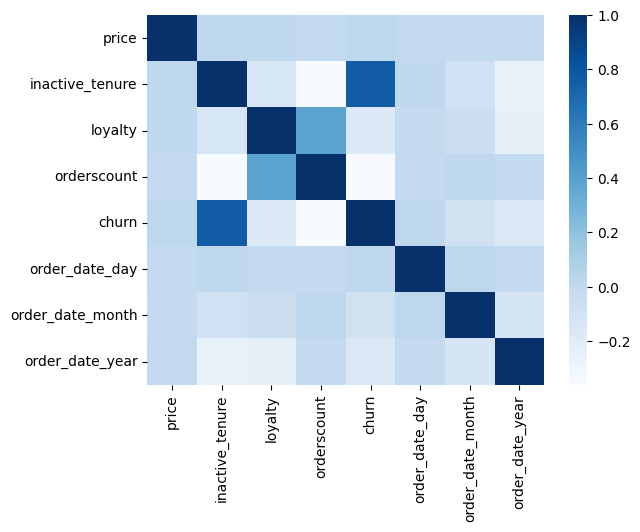

In [201]:
sns.heatmap(my_matrix,cmap="Blues")

In [288]:
#x and y declaration 
x=df.drop(["churn","order_date"],axis=1)
y=df["churn"]


In [335]:
x

,price,inactive_tenure,loyalty,orderscount,order_date_day,order_date_month,order_date_year
0,17.50,182,980,24,23,6,2024
1,7.50,116,799,366,15,10,2022
2,2.67,36,1006,864,30,7,2023
3,15.75,49,965,174,2,5,2022
4,11.82,41,1102,280,8,1,2022
...,...,...,...,...,...,...,...
13883,17.43,224,1095,172,3,3,2022
13884,16.95,35,920,172,8,6,2023
13885,12.67,137,1079,228,16,3,2022
13886,0.63,709,1080,28,16,7,2022


In [289]:
y

0        1
1        0
2        0
3        0
4        0
        ..
13883    1
13884    0
13885    0
13886    1
13887    0
Name: churn, Length: 13888, dtype: int64

In [316]:
from keras.utils import to_categorical # onehot encoder
y_new = to_categorical(y)

In [317]:
#Splitting the data set into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y_new,test_size=0.2,random_state=5)

In [318]:
X_train.shape


(11110, 7)

In [319]:
y_train.shape

(11110, 2)

In [315]:
y_new.shape

(13888, 2)

In [328]:
X_test.shape

(2778, 7)

In [327]:
len(X_train.columns)

7

In [326]:
y_train.shape

(11110, 2)

Build a model (ANN) in tensorflow/keras

In [178]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 620.6 kB/s eta 0:00:00
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 825.8 kB/s eta 0:07:53
   ---------------------------------------- 0.1/390.3 MB 563.7 kB/s eta 0:11:33
   ---------------------------------------- 0.1/390.3 MB 819.2 kB/s eta 0:07:57
   ---------------------------------------- 0.1/390.3 MB 819.2 kB/s eta 0:07:57
   ---------------------------------------- 0.2/390.3 MB 657.6 kB/s eta 0:09:54
   -


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------  383.9/390.3 MB 1.5 MB/s eta 0:00:05
   ---------------------------------------  383.9/390.3 MB 1.5 MB/s eta 0:00:05
   ---------------------------------------  384.0/390.3 MB 1.5 MB/s eta 0:00:05
   ---------------------------------------  384.1/390.3 MB 1.5 MB/s eta 0:00:05
   ---------------------------------------  384.3/390.3 MB 1.5 MB/s eta 0:00:04
   ---------------------------------------  384.4/390.3 MB 1.5 MB/s eta 0:00:04
   ---------------------------------------  384.4/390.3 MB 1.6 MB/s eta 0:00:04
   ---------------------------------------  384.5/390.3 MB 1.5 MB/s eta 0:00:04
   ---------------------------------------  384.6/390.3 MB 1.5 MB/s eta 0:00:04
   ---------------------------------------  384.7/390.3 MB 1.5 MB/s eta 0:00:04
   ---------------------------------------  384.7/390.3 MB 1.5 MB/s eta 0:00:04
   ---------------------------------------  384.8/390.3 MB 1.5 MB/s eta 0:00:04
   -------------------------------------

In [302]:
#Model building

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  # to build layer by layer
from tensorflow.keras.layers import Dense       # to decide depth of each layer

In [321]:




model2=Sequential()
#input dimension is 7 hence 7 neurons - developer scope
model2.add(Dense(256,input_dim=7,activation='relu')) # hidden layer 1
model2.add(Dense(128,activation='relu')) # hidden layer 2
model2.add(Dense(64,activation='relu'))# hidden layer 3
model2.add(Dense(32,activation='relu'))# hidden layer 4
model2.add(Dense(16,activation='relu'))# hidden layer 5
model2.add(Dense(2,activation='softmax'))# output layer
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[
                                                                                'accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall()
                                                                                ])


In [322]:
model2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,842 (179.07 KB)

 Trainable params: 45,842 (179.07 KB)

 Non-trainable params: 0 (0.00 B)

In [323]:
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8916 - loss: 1.7732 - precision_5: 0.8916 - recall_5: 0.8916
Epoch 2/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.1294 - precision_5: 0.9662 - recall_5: 0.9662
Epoch 3/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0676 - precision_5: 0.9747 - recall_5: 0.9747
Epoch 4/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0605 - precision_5: 0.9773 - recall_5: 0.9773
Epoch 5/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0682 - precision_5: 0.9752 - recall_5: 0.9752
Epoch 6/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0338 - precision_5: 0.9857 - recall_5: 0.9857
Epoch 7/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9818 - loss: 0.0438 - precision_5: 0.9818 - recall_5: 0.9818
Epoch 8/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0591 - precision_5: 0.

In [324]:
model2.evaluate(X_test,y_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9997 - loss: 0.0025 - precision_5: 0.9997 - recall_5: 0.9997   


[0.0023996029049158096,
 0.9992800354957581,
 0.9992800354957581,
 0.9992800354957581]

In [325]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0025 - precision_5: 0.9997 - recall_5: 0.9997  
Test Accuracy: 0.9992800354957581
Test Precision: 0.9992800354957581
Test Recall: 0.9992800354957581


In [329]:
#Save the model
final=model2.evaluate(x, y_new)

434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.0016 - precision_5: 0.9998 - recall_5: 0.9998


In [357]:
model2.save('model.h5')

In [354]:
import joblib
joblib.dump(final,'churn_predictor') #saving the model named churn_predictor

['churn_predictor']

In [355]:
# load the model from disk
final_model=joblib.load('churn_predictor')

In [334]:
import pickle
pickle.dump(model2,open("churn_predictor.pkl","wb"))

In [350]:
#prediction on new data
newvalue=[[17,182,980,24,23,6,2024]] #1
newvalue2=[[12.67,137,1079,228,16,3,2022]]#0
newvalue3=[[2.67,36,1006,864,30,7,2023]]#0

In [351]:
newvalue=np.array(newvalue)
newvalue = newvalue.reshape(1, -1)  # Add batch dimension
newvalue2=np.array(newvalue2)
newvalue2 = newvalue2.reshape(1, -1) 
newvalue3=np.array(newvalue3)
newvalue3 = newvalue3.reshape(1, -1) 

In [342]:
# Predict
predictions = model2.predict(newvalue)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
[[0.1943463 0.8056537]]


In [352]:
# Predict
predictions2 = model2.predict(newvalue2)
print(predictions2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
[[1.0000000e+00 6.2720653e-37]]


In [353]:
# Predict
predictions3 = model2.predict(newvalue3)
print(predictions3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[1. 0.]]


In [340]:
x

,price,inactive_tenure,loyalty,orderscount,order_date_day,order_date_month,order_date_year
0,17.50,182,980,24,23,6,2024
1,7.50,116,799,366,15,10,2022
2,2.67,36,1006,864,30,7,2023
3,15.75,49,965,174,2,5,2022
4,11.82,41,1102,280,8,1,2022
...,...,...,...,...,...,...,...
13883,17.43,224,1095,172,3,3,2022
13884,16.95,35,920,172,8,6,2023
13885,12.67,137,1079,228,16,3,2022
13886,0.63,709,1080,28,16,7,2022


In [344]:
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn,order_date_day,order_date_month,order_date_year
0,2024-06-23,17.50,182,980,24,1,23,6,2024
1,2022-10-15,7.50,116,799,366,0,15,10,2022
2,2023-07-30,2.67,36,1006,864,0,30,7,2023
3,2022-05-02,15.75,49,965,174,0,2,5,2022
4,2022-01-08,11.82,41,1102,280,0,8,1,2022
...,...,...,...,...,...,...,...,...,...
13883,2022-03-03,17.43,224,1095,172,1,3,3,2022
13884,2023-06-08,16.95,35,920,172,0,8,6,2023
13885,2022-03-16,12.67,137,1079,228,0,16,3,2022
13886,2022-07-16,0.63,709,1080,28,1,16,7,2022


In [343]:
result=model2.predict(newvalue)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
[[0.1943463 0.8056537]]
